In [3]:
import pandas as pd
import numpy as np

dados = pd.read_csv('Wholesale customers data.csv')
dados

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [4]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [5]:
# definindo as variaveis para a investigação, foram escolhidas baseado na correlação com "Delicassen" = "Milk, Frozen e Fresh"
dados.corr()['Delicassen'].sort_values(ascending=False)

Delicassen          1.000000
Milk                0.406368
Frozen              0.390947
Fresh               0.244690
Grocery             0.205497
Detergents_Paper    0.069291
Channel             0.056011
Region              0.045212
Name: Delicassen, dtype: float64

### Gráfico de cotovelo

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

X = dados.drop(['Grocery', 'Detergents_Paper','Channel', 'Region'], axis=1)


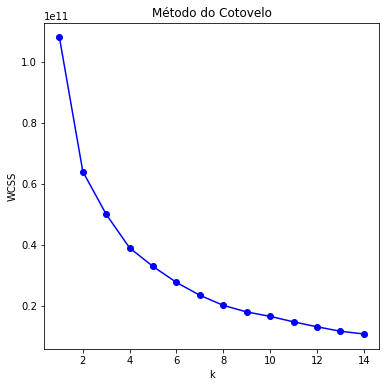

In [7]:
from sklearn.cluster import KMeans

WCSS = []

K = range(1,15)
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    WCSS.append(kmeans.inertia_)

plt.figure(figsize=(6,6))
plt.plot(K, WCSS, '-bo')
plt.xlabel('k')
plt.ylabel('WCSS')
plt.title("Método do Cotovelo")
plt.show()

O número de clusters que melhor separa os dados é o **4** por está no princio da dobra do grafico de cotovelo.

In [8]:
# modelo de clusterização K-média com 4 clusters
kmedia4 = KMeans(n_clusters=4, random_state= 10)
kmedia4_pred = kmedia4.fit_predict(X)

In [9]:
from sklearn.metrics import silhouette_score
print('K-médias com k = 4')

#Verificando metrica de silhueta
print('Silhouette Score:', silhouette_score(X, kmedia4_pred, metric='euclidean'))


K-médias com k = 4
Silhouette Score: 0.43552458801648053


In [10]:
df_cluster = dados
df_cluster['Cluster'] = kmedia4_pred
df_cluster


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
0,2,3,12669,9656,7561,214,2674,1338,1
1,2,3,7057,9810,9568,1762,3293,1776,1
2,2,3,6353,8808,7684,2405,3516,7844,1
3,1,3,13265,1196,4221,6404,507,1788,0
4,2,3,22615,5410,7198,3915,1777,5185,0
...,...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204,0
436,1,3,39228,1431,764,4510,93,2346,3
437,2,3,14531,15488,30243,437,14841,1867,0
438,1,3,10290,1981,2232,1038,168,2125,1


In [11]:
df_cluster['Cluster'].value_counts()

1    293
0    118
3     23
2      6
Name: Cluster, dtype: int64

In [12]:
print('Total de observações do cluster 1: {}'.format(len(df_cluster[df_cluster['Cluster'] == 0])))
print('Total de observações do cluster 2: {}'.format(len(df_cluster[df_cluster['Cluster'] == 1])))
print('Total de observações do cluster 3: {}'.format(len(df_cluster[df_cluster['Cluster'] == 2])))
print('Total de observações do cluster 4: {}'.format(len(df_cluster[df_cluster['Cluster'] == 3])))

Total de observações do cluster 1: 118
Total de observações do cluster 2: 293
Total de observações do cluster 3: 6
Total de observações do cluster 4: 23


### Definindo dois subconjuntos, chamando-os de clusterA e clusterB.

In [13]:
clusterA = df_cluster[df_cluster['Cluster'] == 0]
clusterB = df_cluster[df_cluster['Cluster'] == 1]


In [14]:
clusterA.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
count,118.000000,118.000000,118.000000,118.000000,118.000000,118.00000,118.000000,118.000000,118.0
mean,1.220339,2.567797,20376.322034,3966.796610,5653.906780,4003.70339,1380.533898,1663.338983,0.0
std,0.416243,0.756497,5468.585862,3402.118022,5534.532491,4780.33865,2233.351882,1774.217599,0.0
min,1.000000,1.000000,11243.000000,134.000000,3.000000,42.00000,3.000000,57.000000,0.0
25%,1.000000,2.000000,16233.750000,1437.000000,2078.500000,911.25000,231.250000,604.000000,0.0
50%,1.000000,3.000000,18943.000000,2836.500000,3821.500000,2426.50000,511.500000,1126.500000,0.0
75%,1.000000,3.000000,24496.000000,5318.750000,7320.750000,4957.25000,1632.000000,2195.000000,0.0
max,2.000000,3.000000,34454.000000,16687.000000,34792.000000,35009.00000,14841.000000,14472.000000,0.0


In [15]:
clusterB.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
count,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.0
mean,1.372014,2.511945,5321.655290,5716.559727,8261.337884,2163.491468,3298.556314,1158.255973,1.0
std,0.484169,0.792102,3782.521246,5625.776824,8634.121175,2665.353584,4609.499934,1207.043858,0.0
min,1.000000,1.000000,3.000000,55.000000,137.000000,25.000000,3.000000,3.000000,1.0
25%,1.000000,2.000000,2101.000000,1596.000000,2157.000000,561.000000,273.000000,342.000000,1.0
50%,1.000000,3.000000,4822.000000,3737.000000,5226.000000,1206.000000,1082.000000,776.000000,1.0
75%,2.000000,3.000000,8475.000000,7779.000000,11364.000000,2616.000000,4797.000000,1522.000000,1.0
max,2.000000,3.000000,13134.000000,29892.000000,67298.000000,17866.000000,38102.000000,7844.000000,1.0


In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
cluster_dife_A = clusterA.drop(['Channel', 'Region', 'Cluster'], axis=1)
cluster_dife_B = clusterB.drop(['Channel', 'Region', 'Cluster'], axis=1)

media_a = cluster_dife_A.mean().std()
media_b = cluster_dife_B.mean().std()

min_a = cluster_dife_A.min().std()
min_b = cluster_dife_B.min().std()

max_a = cluster_dife_A.max().std()
max_b = cluster_dife_B.max().std()


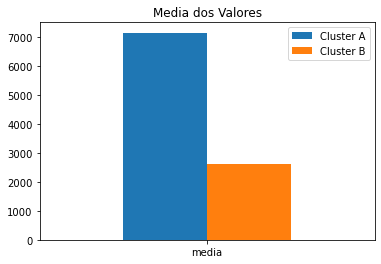

In [18]:
index = ['media']

df_graf = pd.DataFrame({'Cluster A': media_a,'Cluster B': media_b}, index=index)
ax = df_graf.plot.bar(rot=0, title='Media dos Valores')

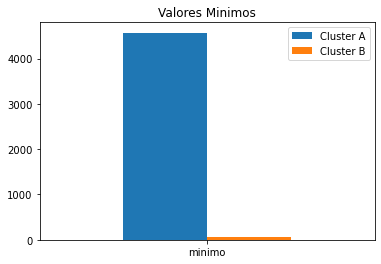

In [19]:
index_max = ['minimo']

df_graf_2 = pd.DataFrame({'Cluster A': min_a,'Cluster B': min_b}, index=index_max)
ax_max = df_graf_2.plot.bar(rot=0, title='Valores Minimos')

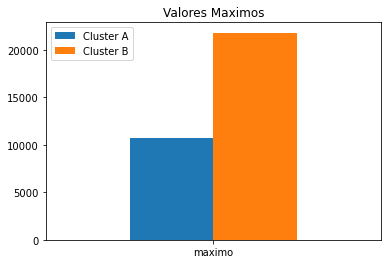

In [20]:
index_max = ['maximo']

df_graf_2 = pd.DataFrame({'Cluster A': max_a,'Cluster B': max_b}, index=index_max)
ax_max = df_graf_2.plot.bar(rot=0, title='Valores Maximos')

Transformando as regiões em variaveis dummy

In [21]:
dummy_vars = pd.get_dummies(clusterA['Region'])
newData = pd.concat([clusterA['Region'], dummy_vars], axis=1, sort=False)
newData.value_counts()

Region  1  2  3
3       0  0  1    86
1       1  0  0    19
2       0  1  0    13
dtype: int64

In [22]:
dummy_vars = pd.get_dummies(clusterB['Region'])
newData = pd.concat([clusterB['Region'], dummy_vars], axis=1, sort=False)
newData.value_counts()

Region  1  2  3
3       0  0  1    205
1       1  0  0     55
2       0  1  0     33
dtype: int64

In [23]:
cluster_dife_A.min()

Fresh               11243
Milk                  134
Grocery                 3
Frozen                 42
Detergents_Paper        3
Delicassen             57
dtype: int64

In [24]:
cluster_dife_B.min()

Fresh                 3
Milk                 55
Grocery             137
Frozen               25
Detergents_Paper      3
Delicassen            3
dtype: int64

In [25]:
dummy_vars = pd.get_dummies(clusterA['Channel'])
newData = pd.concat([clusterA['Channel'], dummy_vars], axis=1, sort=False)
newData.value_counts()

Channel  1  2
1        1  0    92
2        0  1    26
dtype: int64

In [26]:
dummy_vars = pd.get_dummies(clusterB['Channel'])
newData = pd.concat([clusterB['Channel'], dummy_vars], axis=1, sort=False)
newData.value_counts()

Channel  1  2
1        1  0    184
2        0  1    109
dtype: int64

Um rotulo possivel para identificar os agrupamentos seria **Horecas que compram produtos frescos** e **Horecas que não compram produtos frescos**. Ao agrupar as features foi observado que as compras frescas de horecas de outras regiões ficaram bem separadas entre os **clusterA** e **clusterB**